<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/VoiceRecognition/voiceidentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#import 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential as seq
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.layers import MaxPooling2D as mp2d 
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix as CM
from google.colab import files 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
files.upload()

In [23]:
data = pd.read_csv('voice.csv')

In [24]:
le = LE()
data['label'] = le.fit_transform(data['label'])

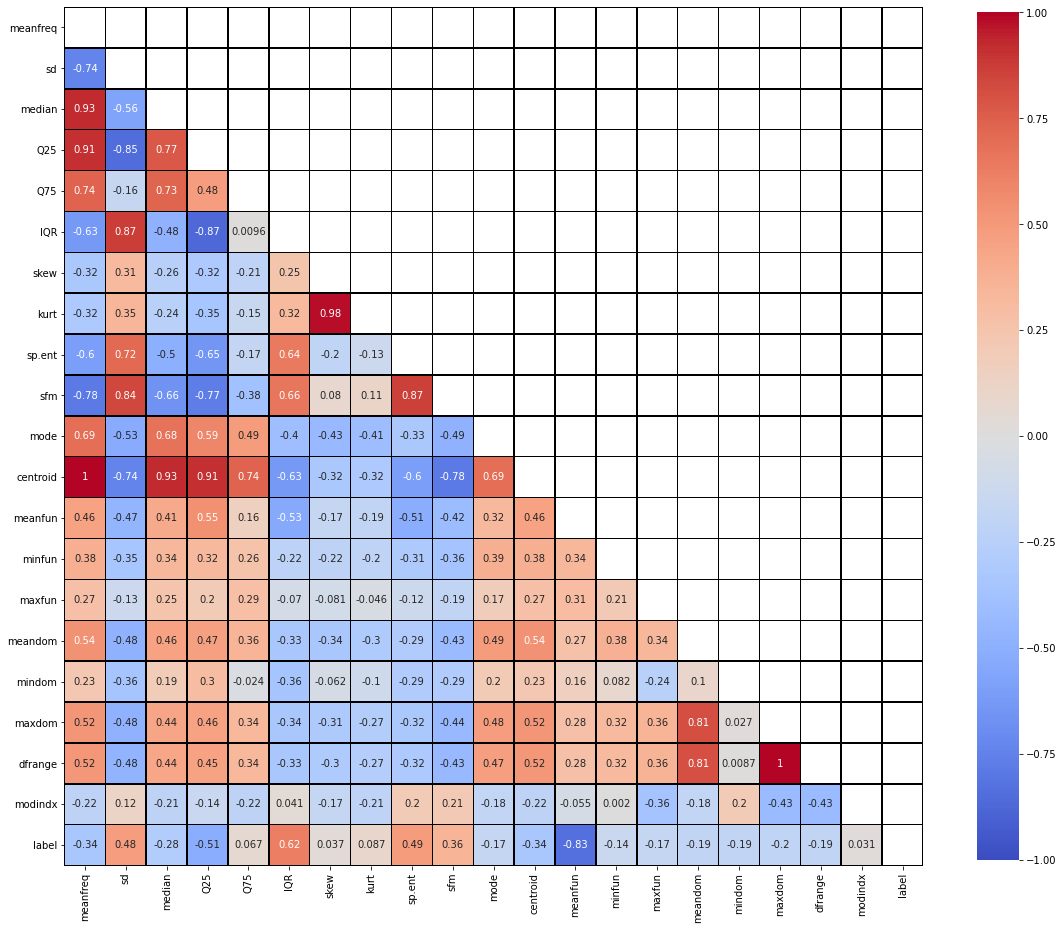

In [25]:
#visualize the correlations between variables
corr = data.corr(method='pearson')
fig = plt.figure(figsize=(16,16))
plot = fig.add_subplot(1,1,1)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cm.coolwarm,
            linewidths=0.5, linecolor='black',
            square=True, mask = mask, 
            cbar_kws={"shrink": .75})
plt.tight_layout()

In [26]:
Y = data['label']
data = data.drop(columns=['label'],axis = 1)

ss = SS()
data = ss.fit_transform(data)

In [27]:
data.shape

(3168, 20)

In [28]:
trainX,testX,trainY,testY = tts(data,Y,test_size=0.2,random_state=0)

In [32]:
#create architecture
arch = seq()
arch.add(Dense(units = 21, input_shape= (20,), activation = 'relu')) 
arch.add(Dense(units = 32, activation = 'relu')) 
arch.add(Dense(units = 64, activation = 'relu')) 
arch.add(Dense(units = 64, activation = 'relu')) 
arch.add(Dense(units = 32, activation = 'relu')) 
arch.add(Dense(units = 2, activation = 'softmax'))
arch.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
#create Random Forest Classifier
rfc = RFC(n_estimators = 30, criterion = 'entropy', random_state = 0)
rfc.fit(trainX,trainY)

#create XGBC
xgbc = XGBC()
xgbc.fit(trainX,trainY)

arch.fit(trainX,trainY,batch_size=32,epochs=12)

Epoch 1/12
80/80 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.7246
Epoch 2/12
80/80 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9521
Epoch 3/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9720
Epoch 4/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9761
Epoch 5/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9754
Epoch 6/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9795
Epoch 7/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9836
Epoch 8/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9874
Epoch 9/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9829
Epoch 10/12
80/80 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9841
Epoch 11/12
80/80 [

In [37]:
rfcpredict = rfc.predict(testX)
xgbpredict = xgbc.predict(testX)
annpredict = arch.predict(testX)

In [39]:
ans = annpredict.argmax(axis=1)

In [40]:
rfcConf = CM(rfcpredict,testY)
xgbConf = CM(xgbpredict,testY)
annConf = CM(ans,testY)
print("RFC Confusion Matrix: ")
print(rfcConf)
print("XGBC Confusion Matrix: ")
print(xgbConf)
print("ANN Confusion Matrix: ")
print(annConf)

RFC Confusion Matrix: 
[[296   4]
 [  5 329]]
XGBC Confusion Matrix: 
[[297   4]
 [  4 329]]
ANN Confusion Matrix: 
[[296   7]
 [  5 326]]


In [41]:
print("RFC Accuracy: ", acc(rfcpredict,testY)*100,'%')
print("XGBC Confusion Matrix: ", acc(xgbpredict,testY)*100,'%')
print("ANN Confusion Matrix: ", acc(ans,testY)*100,'%')

RFC Accuracy:  98.58044164037855 %
XGBC Confusion Matrix:  98.73817034700315 %
ANN Confusion Matrix:  98.10725552050474 %
